# **Importing all the essential libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('/Users/Asus/Desktop/vehicles.csv')

# **Exploratory Data Analysis (EDA)**

In [3]:
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
293218,7311447492,https://cleveland.craigslist.org/ctd/d/south-a...,cleveland,https://cleveland.craigslist.org,63990,2017.0,NaN,Freightliner M2 106 Medium Duty,good,6 cylinders,...,full-size,truck,white,https://images.craigslist.org/00v0v_1ZMx374UaY...,2017 Freightliner M2 106 Medium Duty 24 FOOT B...,NaN,oh,40.468785,-74.281707,2021-04-23T13:38:44-0400
240279,7316784639,https://raleigh.craigslist.org/ctd/d/raleigh-2...,raleigh / durham / CH,https://raleigh.craigslist.org,4950,2005.0,toyota,sienna,good,6 cylinders,...,full-size,van,blue,https://images.craigslist.org/01313_6QeEMchtln...,"2005 Toyota Sienna 4dr CE 7-Passenger - $4,950...",NaN,nc,35.710933,-78.660041,2021-05-04T12:45:26-0400
396724,7311056800,https://richmond.craigslist.org/ctd/d/thornbur...,richmond,https://richmond.craigslist.org,9970,2009.0,ford,f-150 xlt 4x4,good,8 cylinders,...,full-size,pickup,white,https://images.craigslist.org/00I0I_4SimWAN4MA...,"VIN: 1FTPX14V09KB41805 MILEAGE: 167,546 This...",NaN,va,38.133829,-77.522010,2021-04-22T17:04:22-0400
16774,7310662611,https://tucson.craigslist.org/ctd/d/tucson-for...,tucson,https://tucson.craigslist.org,16999,2004.0,ford,f350,excellent,8 cylinders,...,full-size,pickup,white,https://images.craigslist.org/00m0m_g6M9oHqSx3...,😍 2004 Ford F-350 Supercab XLT Diesel Only 91k...,NaN,az,32.280672,-110.994405,2021-04-21T18:17:42-0700
404144,7309645362,https://kpr.craigslist.org/ctd/d/pasco-2017-ca...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2017.0,cadillac,xt5 luxury awd gas suv,NaN,NaN,...,NaN,SUV,blue,https://images.craigslist.org/00Z0Z_bLGw4cmYKA...,2017 Cadillac XT5 Luxury AWD **Clean Carfax AW...,NaN,wa,46.234838,-119.128015,2021-04-19T20:27:05-0700


In [4]:
df.shape

(426880, 26)

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

**Checking total missing values**

In [6]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Data Cleaning**

**Extracting important features (Feature Selection)**

In [8]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)

**Handling missing values**

In [9]:
df.isna().sum()/df.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

**We can see that "year", "manufacturer", "model", and "odometer" column has less than 5% of null values. So we can simply drop those rows which have null values in these two columns.**

In [10]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

**For all the missing values in other columns, we have just converted them in to a new category, "unknown"**

In [11]:
df.fillna('unknown', inplace=True)

**Handling duplicated values**

In [12]:
df.duplicated().sum()

53043

In [13]:
df.shape

(399883, 14)

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(346840, 14)

**Categorical data cleaning**

In [16]:
manufacturer_values = df['manufacturer'].value_counts()

In [17]:
print(manufacturer_values)

manufacturer
ford               60022
chevrolet          46111
toyota             29054
honda              18088
jeep               15913
nissan             15796
ram                14641
gmc                14283
bmw                12802
dodge              11137
mercedes-benz      10083
hyundai             8438
volkswagen          8283
subaru              8193
lexus               7138
kia                 6969
audi                6816
cadillac            5911
acura               5469
chrysler            5103
buick               4753
mazda               4702
infiniti            4319
lincoln             3764
volvo               2907
mitsubishi          2874
mini                2090
pontiac             2022
jaguar              1813
rover               1572
porsche             1179
mercury             1005
saturn               932
alfa-romeo           859
tesla                812
fiat                 699
harley-davidson      121
ferrari               69
datsun                61
aston-martin

In [18]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [19]:
region_values = df['region'].value_counts()
df['region'] = df['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [20]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [21]:
for i in df.columns:
  print(i, len(df[i].value_counts().index))

region 51
price 15274
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


**Numerical Data Cleaning**

In [22]:
df.describe()

,price,year,odometer
count,3.468400e+05,346840.000000,3.468400e+05
mean,6.997499e+04,2011.526814,9.501220e+04
std,1.213391e+07,8.876408,1.848760e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.600000e+04
50%,1.458800e+04,2014.000000,8.358900e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


**Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.**

In [23]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [24]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)

In [25]:
new_df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [26]:
print(price_upper_limit)

58475.0


In [27]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

In [28]:
new_df = new_df[(new_df['odometer'] < odometer_upper_limit) & (new_df['odometer'] > odometer_lower_limit)]

In [29]:
new_df.shape

(273590, 14)

In [30]:
new_df = new_df[new_df['price'] > 0]

In [31]:
new_df.shape

(273590, 14)

# **Feature Engineering**

In [32]:
new_df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
389342,others,33590,2014.0,toyota,others,good,unknown,other,55251.0,clean,other,unknown,pickup,red
73497,colorado springs,11699,2015.0,kia,others,unknown,4 cylinders,gas,82864.0,clean,automatic,fwd,wagon,black
291182,cincinnati,24590,2016.0,chevrolet,others,good,6 cylinders,gas,100851.0,clean,other,4wd,pickup,red
277824,others,43990,2016.0,chevrolet,others,good,8 cylinders,gas,45542.0,clean,automatic,rwd,unknown,white
380271,others,12995,2009.0,lexus,others,unknown,unknown,gas,99200.0,clean,automatic,fwd,unknown,unknown


In [33]:
new_df['odometer'] = new_df['odometer'].astype(int)

In [34]:
new_df['year'] = new_df['year'].astype(int)

**We can see the car data before 2000 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996**

In [35]:
new_df = new_df[new_df['year'] > 2000]
new_df.shape

(260292, 14)

In [36]:
new_df['car_age'] = 2023 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)
new_df.describe()

,price,odometer,car_age
count,260292.000000,260292.000000,260292.000000
mean,19719.302334,89494.793332,9.823602
std,12046.770816,56575.311721,4.584402
min,3525.000000,6958.000000,1.000000
25%,9295.000000,39622.750000,6.000000
50%,16999.000000,84000.000000,9.000000
75%,27995.000000,129490.250000,13.000000
max,58448.000000,278495.000000,22.000000


In [37]:
final_df = new_df.copy()

**Creating encoder and implimenting them into pipeline**

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

In [40]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [41]:
column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'region', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

**Train-test-split**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)

In [44]:
X_train_tnf = column_transformer.fit_transform(X_train)

C:\Users\Asus\PycharmProjects\cars_prediction_project\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
X_test_tnf = column_transformer.transform(X_test)

In [46]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(208233, 172)
(52059, 172)


# **Model Training**

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [48]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

**Linear Regression**

In [49]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [50]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.6557
Mean squared error:  50303416.62
Mean absolute error:  5360.35
Root mean squared error:  7092.49


**Random Forest Regression**

In [51]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [52]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.8614
Mean squared error:  20252329.45
Mean absolute error:  2576.95
Root mean squared error:  4500.26


In [53]:
def get_transformed_feature_names(column_transformer):
    transformed_feature_names = []

    for transformer_info in column_transformer.transformers_:
        transformer_name, transformer, original_features = transformer_info
        if transformer_name == 'remainder':
            continue

        if hasattr(transformer, 'get_feature_names_out'):
            # For OneHotEncoder
            transformed_names = transformer.get_feature_names_out(original_features)
        else:
            # For other transformers like OrdinalEncoder
            transformed_names = original_features

        transformed_feature_names.extend(transformed_names)

    return transformed_feature_names

# Get transformed feature names
transformed_feature_names = get_transformed_feature_names(column_transformer)

# Get feature importances
importances = RFR.feature_importances_

# Map features to their importances
feature_importances = dict(zip(transformed_feature_names, importances))

# Sort features by importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

odometer: 0.4144900841366463
drive_fwd: 0.06736194833786502
fuel_gas: 0.053373822361227376
transmission_other: 0.04941305237394646
cylinders_4 cylinders: 0.029733729951570313
condition: 0.028345456154084302
type_pickup: 0.02543377708559909
type_truck: 0.023489071713413252
cylinders_8 cylinders: 0.017721236396988204
drive_unknown: 0.014785099208000672
drive_rwd: 0.012171985061342615
manufacturer_ram: 0.011989260508210784
type_sedan: 0.010324439772834723
paint_color_white: 0.009013267414660383
cylinders_unknown: 0.008509765707556644
manufacturer_ford: 0.008063691030725425
type_unknown: 0.007836735874222985
paint_color_unknown: 0.007797766314802394
cylinders_6 cylinders: 0.00767927771308868
model_others: 0.006492307951486531
region_others: 0.006196085076245756
fuel_other: 0.00592292422474301
manufacturer_chevrolet: 0.005921581097143916
manufacturer_others: 0.005559158230488179
manufacturer_toyota: 0.005352615827711894
type_other: 0.005263441709270918
paint_color_silver: 0.0049465704472354

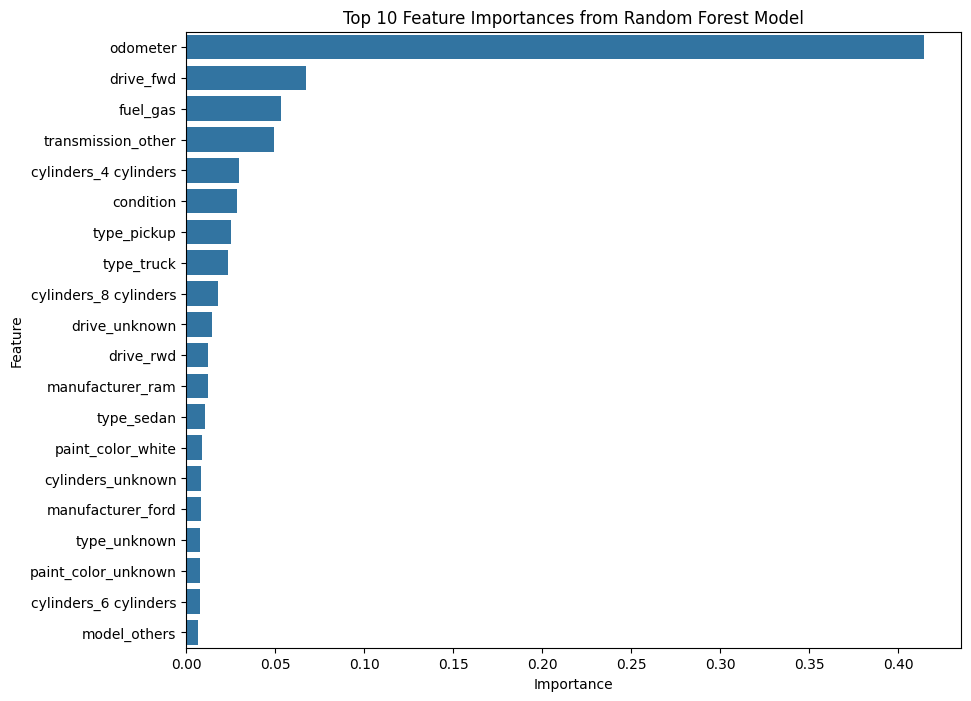

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'sorted_importances' is from the previous step

# Convert to DataFrame for easier plotting
importances_df = pd.DataFrame(sorted_importances, columns=['Feature', 'Importance'])

# Select the top 10 features
top_10_importances_df = importances_df.head(20)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_importances_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Random Forest Model')

# Show the plot
plt.show()
